### The Data

We will be using data from a Kaggle data set:
https://www.kaggle.com/harlfoxem/housesalesprediction

Based on the dataset for different housing features, we are going to predict the price the house should sell at.
Housing features: No. of bedrooms, No. of bathrooms, square footage etc, Deep learning model is built to 
predict the price of the house

Feature Columns:

id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\priya\\Desktop\\intro to datascience\\TensorFlow_FILES\\DATA\\kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EXPLORATORY DATA ANALYSIS

In [6]:
#checking for missing data:
df.isnull().sum()      #isnull() --> falses as 0 and Trues as 1

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


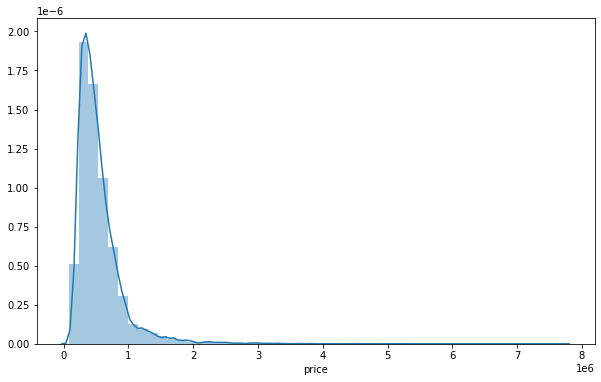

In [8]:
plt.figure(figsize = (10,6))
sns.distplot(df['price'])

In [9]:
# it is good to drop the outliers if there are only a few of them. As there may not be a lot of houses more than 2M$, 
# it may not be useful to train our model based on these outliers.

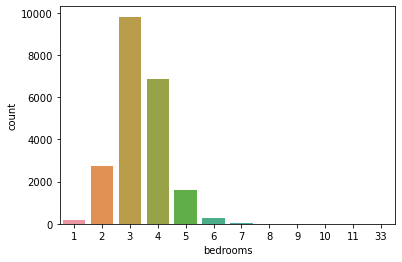

In [10]:
#For Categorical variables such as number of bedrooms, we can use countplot, as 1.5 bedroom is practically not possible
sns.countplot(df['bedrooms'])

In [11]:
# 8 upto 33 have atleast one instances, but we can treat them as outliers.
# Vast majority of these houses have somewhere between  2-5 bedrooms

In [12]:
# For comparing the label 'Price' with some other feature, which might have high correlation
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

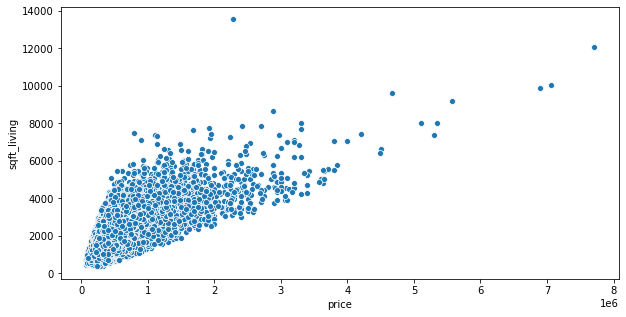

In [13]:
# We see that sqft_living space is having high correlation with the Price label. 
# To explore that features using some data visualization:

plt.figure(figsize = (10,5))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

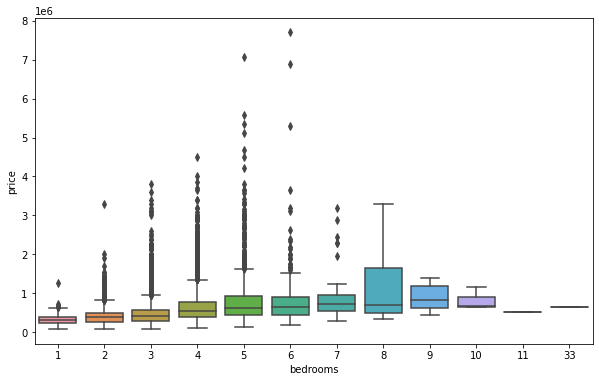

In [14]:
sns# comparing correlation between bedrooms and bathrooms using boxplot
plt.figure(figsize = (10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

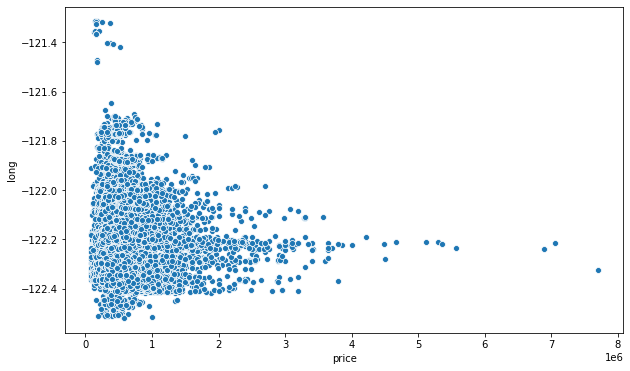

In [15]:
#price didtribution per latitude and longitude:

plt.figure(figsize = (10,6))
sns.scatterplot( x = 'price', y = 'long', data =df)

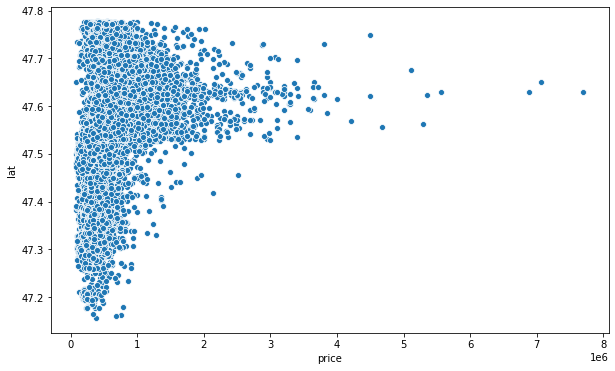

In [16]:
# at long -122.2 seems to look like an expensive housing area
# repating with latitude
plt.figure(figsize = (10,6))
sns.scatterplot( x = 'price', y = 'lat', data =df)

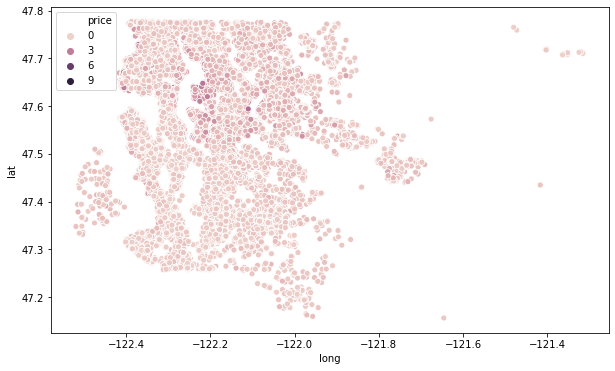

In [17]:
# same goes with latitude i.e. 47.6. thus there should be a hotpot in the map, which has expensive houses in King county
# recreating the map of king county using scatterplot. 
# to check the expensive area, use hue as price
plt.figure(figsize = (10,6))
sns.scatterplot( x = 'long', y = 'lat', data =df, hue = 'price')

In [18]:
# We can see the same lat and long has darker hue for price.

In [19]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [20]:
# most expensive house is $7.7M and it quickly drops off to 3.6M$ in just 19 rows 
# And as we saw in the distplot we should eliminate all the outliers above 3M as only 20 houses come under this price

In [21]:
len(df)*0.01 #one percent of 21597
# So, to grab the top 99% of houses and eliminate the bottom 1%(of the sorted value) as it maybe the outliers

215.97

In [22]:
non_to_one_perc =df.sort_values('price', ascending = False).iloc[216:] #grabbing 99% houses, 
# so that it drops that really expensive outlier houses

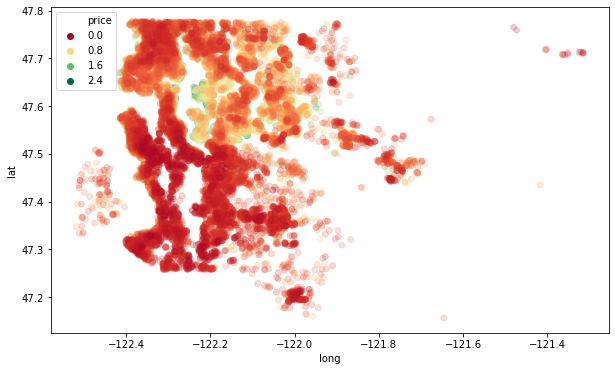

In [23]:
# now to see a clearer color distribution,
plt.figure(figsize = (10,6))
sns.scatterplot( x = 'long', y = 'lat', data = non_to_one_perc, edgecolor = None, alpha = 0.2, palette = 'RdYlGn',
                hue = 'price')

In [24]:
# this plot shows us where the expensive houses in king county is i.e. green.
# This green points are on the edge of the water, which makes sense as waterfront property is more costly than inland property
# This is shown in the boxplot below:

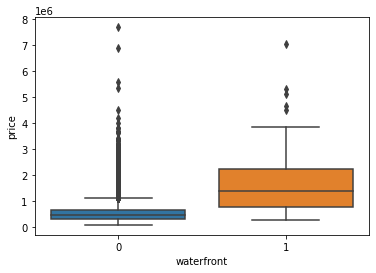

In [25]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [26]:
# the more expensive houses are on the waterfront.

### FEATURE ENGINEERING

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
# Something we can drop right away is : id

In [29]:
df = df.drop('id', axis =1)

In [30]:
df['date'] # its a string object,lets convert it into date time object 
# so as to extract the information such as month/year automatically

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
# lambda expression -->   def year_extraction(date):
#                            return date.year    

In [33]:
df['year'] = df['date'].apply(lambda  date: date.year)
df['month'] = df['date'].apply(lambda  date: date.month)

In [34]:
# features which were hidden in the date time stamp i.e date column here, has been extracted i.e. year and month column.
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


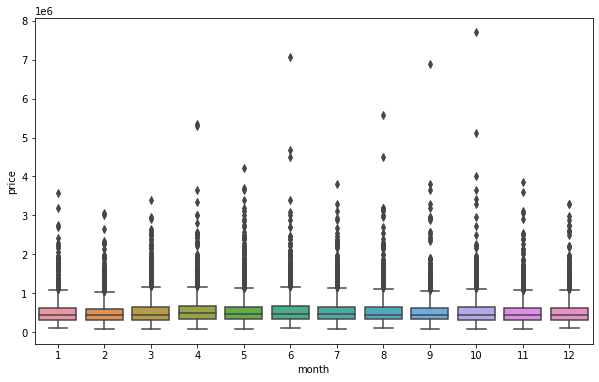

In [35]:
# now lets do some exploartory data analysis to see whether these columns are useful.
plt.figure(figsize =(10,6))
sns.boxplot( x = 'month', y= 'price', data =df)

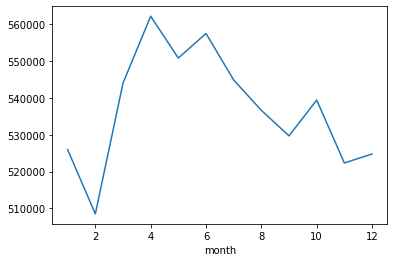

In [36]:
# not any significant behaviour spotted
df.groupby('month').mean()['price'].plot()
# we see not much difference spotted from 510k -560k

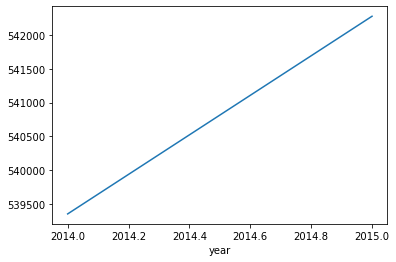

In [37]:
df.groupby('year').mean()['price'].plot()
# price increases every year

In [38]:
# dropping the date column as it is not longer useful to us
df =df.drop('date', axis=1)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [40]:
#zipcode is numerical, if we feed thsi to our model , it will be taken as some continous feature.
# to keep it as category lets see how many unique values does this column have:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [41]:
# 70 is too much to categorize, so we just take them out for now
df = df.drop('zipcode',axis = 1)

In [42]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [43]:
df['yr_renovated'].value_counts() 

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
# most of the values are 0, that means it was not renovated.# However higher year tends to correlate with more value
# as most recent renovation, intuitively more the sale value, In this case.

In [45]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [46]:
# having a basement would have less value than having a very large basement.

### SCALING FEATURES, CREATING AND TRAINING THE MODEL

In [77]:
# Training the model:
X = df.drop('price', axis =1).values   # values returns the numpy array underneath the actual dataframes as tensorflow works with array as it cannot work with pandas series or dataframes
y = df['price'].values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [79]:
# scaling should be done post split, as we want to apply only to the train set
# so that to prevent data leakage from test set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
# fit and transforming in one step
X_train = scaler.fit_transform(X_train)

In [81]:
# transform is done to test set
X_test = scaler.transform(X_test)

In [99]:
# Creating the model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [100]:
model = Sequential()
# we base the number of neurons or units in layers depending on the size of the actual feature data
X_train.shape

(15117, 19)

In [101]:
# we have 19 incoming features, so its good to have 19 neurons in our layer
model.add(Dense(19, activation = 'relu'))   # relu- rectified linear unit
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))   # --> making this a deep learning network
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))                         # output layer which is going to predict price

In [102]:
# compiling this model,
model.compile(optimizer= 'adam', loss = 'mse') 
# regression problem with continous metric called price, we are choosing lose metric as mse

In [103]:
# we are also going to pass validation data, as after each epoch we can keep a track on how 
# well the model is performing not just on training data but also the test data
# batch size in powers of 2, batches of train size of how it is passed to training

model.fit( x = X_train, y= y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 432763208226.1334 - val_loss: 418932064256.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 440913136298.6667 - val_loss: 415347277824.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 421679535718.4000 - val_loss: 380704063488.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 365817242419.2000 - val_loss: 260838834176.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 242042376192.0000 - val_loss: 119481909248.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 118606166084.2667 - val_loss: 95253749760.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 103870409113.6000 - val_loss: 93580894208.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 100327046690.1333 - val_loss: 91934744576.0000
Epoch 9/400
119/119

119/119 [==============================] - 0s 2ms/step - loss: 31476653994.6667 - val_loss: 31750604800.0000
Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32750979976.5333 - val_loss: 31717908480.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 34400575129.6000 - val_loss: 31630168064.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32626657570.1333 - val_loss: 31588605952.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 31861296844.8000 - val_loss: 31733026816.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 34178111300.2667 - val_loss: 31539337216.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32106535731.2000 - val_loss: 31498995712.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32378492672.0000 - val_loss: 31450310656.0000
Epoch 142/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 31531479722.6667 - val_loss: 28978061312.0000
Epoch 267/400
119/119 [==============================] - 0s 3ms/step - loss: 31538590293.3333 - val_loss: 28880050176.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 32191983735.4667 - val_loss: 28996919296.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30407429188.2667 - val_loss: 28878987264.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 31108014796.8000 - val_loss: 28882120704.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 29400497561.6000 - val_loss: 28872062976.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 31152297318.4000 - val_loss: 28837126144.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30114535577.6000 - val_loss: 28817602560.0000
Epoch 274/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28105818026.6667 - val_loss: 27407480832.0000
Epoch 399/400
119/119 [==============================] - 0s 3ms/step - loss: 28451636121.6000 - val_loss: 27498819584.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 28166695424.0000 - val_loss: 27502843904.0000


### MODEL EVALUATIONS AND PREDICTIONS

In [104]:
# Explore model history  which gives us the loss:
model.history.history
# But because, I have passed validation data tuple also, we can convert this into a dataframe:
losses = pd.DataFrame(model.history.history)
# loss is loss on training set. val_loss is loss on test set
losses

,loss,val_loss
0,4.302434e+11,4.189321e+11
1,4.292583e+11,4.153473e+11
2,4.142148e+11,3.807041e+11
3,3.399049e+11,2.608388e+11
4,1.912443e+11,1.194819e+11
...,...,...
395,2.966023e+10,2.742688e+10
396,2.961792e+10,2.746826e+10
397,2.962640e+10,2.740748e+10
398,2.962526e+10,2.749882e+10


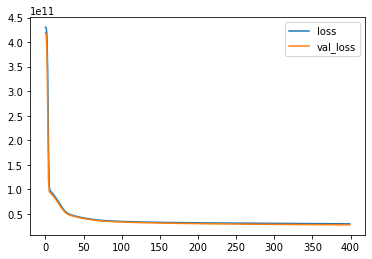

In [105]:
# We can compare the loss of training v/s the loss of validation, to seeif we are overfitting the data on my model
# So by plotting, we can find out that:
losses.plot()

In [106]:
# Result says there is a decrease of both val loss and training loss and
# As we dont see any spike of val loss, we could have continued adding training data without overfittinh.
# if we see the orange line spike after some epochs that means, that means we are overfitting the training data.
# in that case we should have implemented, early stopping.

EVALUATION ON TEST DATA

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
# we grab our predictions,
predictions = model.predict(X_test)
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.        ,
        0.63636364],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.        ,
        0.81818182],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.        ,
        0.90909091],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 0.        ,
        1.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 1.        ,
        0.09090909],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.        ,
        0.45454545]])

In [109]:
predictions

array([[393881.53],
       [596448.  ],
       [576452.06],
       ...,
       [388566.62],
       [563524.56],
       [699161.3 ]], dtype=float32)

In [110]:
# we have list of predictions compare this with our y_test data

In [111]:
mean_squared_error(y_test, predictions)

27502842193.92118

In [112]:
# we can take the sqrt, as we are predicting price squared error will give us a large value
np.sqrt(mean_squared_error(y_test, predictions))
# rms error

165839.80883346792

In [113]:
# mean_absolute_error is the average absolute error accross all of your predictions
mean_absolute_error(y_test, predictions)

103181.28011429399

In [114]:
# we are off by 100k $. To check whether it is good or bad, we have to check the data
df['price'].describe()


count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [115]:
# we see that mean price is, 5.402966e+05. and we are off by 103k$. almost 20%

In [116]:
# using explained variance score # best is 1 # How much variance is explained by your documentation model
explained_variance_score(y_test, predictions)

0.793195411986243

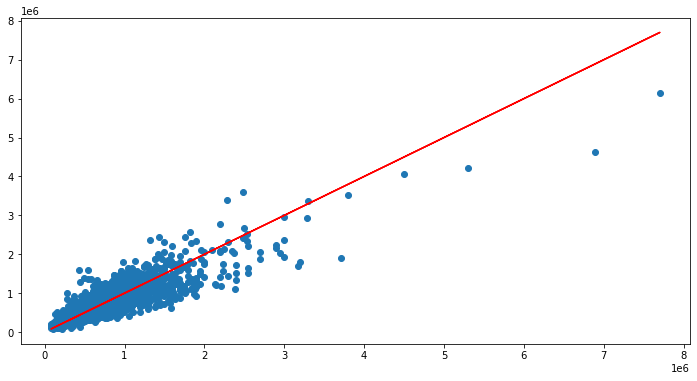

In [124]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [130]:
# We see that the really expensive houses were not good at predicting the price. It essentially a good fit between 0 to 2M $
# that is what the explained_variance score is trying to say.
# We can train the model with the bottom 99% of the houses and achive better results

### PREDICTING ON A NEW HOUSE

In [128]:
# To predict the price of a say, a brand new house with the following new features using the model:
single_house = df.drop('price', axis = 1).iloc[0]

In [134]:
# scaling the features
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [135]:
model.predict(single_house) # the price it will sell at is 288k

array([[288841.38]], dtype=float32)

In [136]:
#cross checking at what price it actually got sold:
df.head(1)   #is 221k

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# This maybe due to teh outliers present above 3M$ . # its better if we rebuild the model by dropping these outliers